## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri

# Olist

Big part of our task is to create "Features", variables in the data that represent an aspect of the phenomenon we study and help us explain it.


### **Exercise**

We are going to investigate the relationship between orders and the score.

The idea is to create a dataframe with the following features:

| feature_name                  | type  | description                                                                                                                                              |
|:------------------------------|:---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id`                    | str  | the id of the order                                                                                                                                      |
| `waiting_time`                | float  | number of days between order_date and delivered_date                                                                                                   |
| `expected_wait_time`          | float  | number of days between order_date and estimated_delivery_date                                                                                          |
| `real_vs_expected`            | float  | if the actual delivery date is later than the estimated delivery date, it returns the number of days between the two dates; otherwise, it returns 0 |
| `order_status`                | str  | order status                                                                                                                                            |
| `is_five_star`                | int  | 1 if it had five stars in the review, 0 otherwise                                                                                                      |
| `is_one_star`                 | int  | 1 if it had one star, 0 otherwise                                                                                                                       |
| `review_score`                | int  | from 1 to 5                                                                                                                                              |
| `number_of_products`          | int  | number of products contained in an order                                                                                                               |
| `number_of_sellers`           | int  | number of unique sellers                                                                                                                                |
| `price`                       | float  | total price paid by the customer                                                                                                                       |
| `freight_value`               | float  | the value of the freight paid by the customer                                                                                                          |
| `distance_to_customer`        | float  | distance in km between customer and seller                                                                                                             |

We want to filter undelivered orders.

**Methodology:**

We are going to create two notebooks, one for testing and another one to import our `preprocess.orders_data` package and then work on the methods.

1st Method: Load_data: It brings the dataset without null values from a predefined location.

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [376]:
# Import orders data
from functions.load_data import load_all_data
data = load_all_data("data")

In [377]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'primary_table', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [378]:
orders = data['orders'].copy()

## 1. Create orders.py

### a) `waiting_time`
Build a dataframe that includes `order_id`, `waiting_time`, `expected_wait_time`, `real_vs_expected`, and `order_status`.

In [379]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [380]:
orders.dtypes

order_id                             object
customer_id                          object
order_status                         object
order_purchase_timestamp             object
order_approved_at                    object
order_delivered_carrier_date         object
order_delivered_customer_date        object
order_estimated_delivery_date        object
dtype: object

In [381]:
orders.columns

Index(['order_id                         ',
       'customer_id                      ', 'order_status ',
       'order_purchase_timestamp ', 'order_approved_at ',
       'order_delivered_carrier_date ', 'order_delivered_customer_date ',
       'order_estimated_delivery_date'],
      dtype='object')

I realized that columns have white spaces, so I import the white spaces remover function from the preprocess.py file.

In [382]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

In [383]:
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

I filter the data by delivered orders since we are interested in the waiting time. Orders that have not been delivered yet do not have a waiting time.

In [384]:
delivered_orders  = orders[orders['order_status'] == 'delivered']
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Transform columns to DateTime

In [385]:
from functions.preprocess import transformar_columnas_datetime 
delivered_orders = transformar_columnas_datetime(delivered_orders)

In [386]:
delivered_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Delta timing between order and delivered date
##### I have just computed the number of days in each time_delta

In [387]:
from functions.preprocess import calcular_time_delta
start_date = "order_purchase_timestamp"
end_date = "order_delivered_customer_date"
delivered_orders = calcular_time_delta(delivered_orders, start_date, end_date)
delivered_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


## Real waiting time calculation

In [388]:
from functions.preprocess import tiempo_de_espera_real
delivered_orders = tiempo_de_espera_real(delivered_orders,is_delivered=False)
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877


## Expected waiting time calculation

In [389]:
from functions.preprocess import tiempo_de_espera_esperado
delivered_orders = tiempo_de_espera_esperado(delivered_orders,is_delivered=False)
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049


In [390]:
delivered_orders[delivered_orders["tiempo_de_espera"] - delivered_orders["tiempo_de_espera_pronosticado"] > 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,21.0,21.327963,9.394792
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,28.0,28.928484,19.009109
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,30.0,30.374757,30.333495
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33.0,33.896933,26.105694
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,24.0,24.943414,23.381771
...,...,...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,18.0,18.053148,13.050764
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,22.0,22.924213,19.091007
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,39.0,39.842222,18.129039
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,20.0,20.209178,18.175486


## Real vs Expected waiting time calculation
##### If a number in real_vs_expected is negative, I have replaced it with 0

In [391]:
from functions.preprocess import real_vs_esperado
delivered_orders = real_vs_esperado(delivered_orders, is_delivered=True)
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado,real_vs_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049,0.0


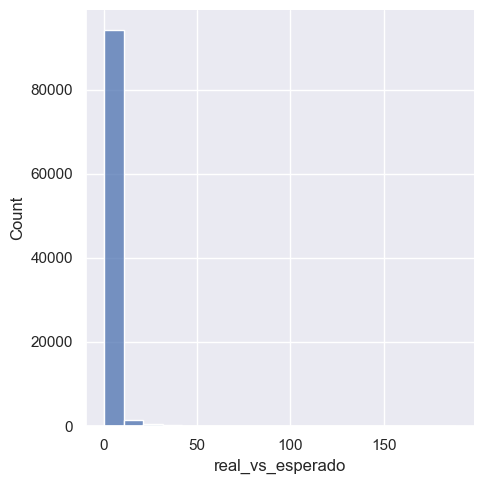

In [392]:
sns.displot(delivered_orders['real_vs_esperado'])

___

### b) `purchase_score`
Returns a dataframe with `order_id`, `is_five_star`, `is_one_star`, and `review_score`.

In [393]:
reviews = data['order_reviews'].copy()
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,...,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,...,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,...,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado. ...,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [394]:
reviews.columns

Index(['review_id                        ',
       'order_id                         ', 'review_score ',
       'review_comment_title      ',
       'review_comment_message                                                                                                                                                                                           ',
       'review_creation_date ', 'review_answer_timestamp'],
      dtype='object')

I realized that columns have white spaces, so I import the white spaces remover function from the preprocess.py file.

In [395]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(reviews)

In [396]:
from functions.preprocess import review_score   
reviews = review_score(reviews)
reviews.head()

,order_id,es_cinco_estrellas,es_una_estrella,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5


___

### c) `number_of_products`:
Returns a dataframe with `order_id` and `number_of_products` (number_of_products_per_order).

In [397]:
from functions.preprocess import calcular_numero_de_productos
products = calcular_numero_de_productos(data)
products


,order_id,num_de_produc
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### d) `number_of_sellers`:
Returns a dataframe with `order_id` and `number_of_sellers` (total number of UNIQUE sellers).

In [398]:
from functions.preprocess import vendedores_unicos
suppliers = vendedores_unicos(data)
suppliers

,order_id,vendedores_unicos
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### e) `calculate_price_and_freight`
Returns a DataFrame with:
`order_id`, `price`, `freight_value`

In [399]:
from functions.preprocess import calcular_precio_y_transporte 
price_and_freight = calcular_precio_y_transporte(data)
price_and_freight

,order_id,precio,transporte
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


___

### f) `distance_to_customer`

Returns a dataframe with `order_id` and `distance_to_customer` (distance in kilometers).

In order to accomplish this point I will use the `haversine_distance` function from the `preprocess.py` file and the following datasets:

- `order_items`
- `sellers`
- `customers`

I make a copy of them in order to avoid any change in the original datasets.

In [400]:
order_items = data['order_items'].copy()
sellers = data['sellers'].copy()
buyers = data['customers'].copy()

In [401]:
from functions.preprocess import whitespace_remover_and_columns
sellers = whitespace_remover_and_columns(sellers)
order_items = whitespace_remover_and_columns(order_items)
buyers = whitespace_remover_and_columns(buyers)

I will import the geolocation dataset. We need to remember that a same zip code can have different latitudes and longitudes.

In order to remain with the first one, I will be usuing the .first() method.

In [402]:
geo = data['geolocation'].copy()
geo = geo.groupby('geolocation_zip_code_prefix').first().reset_index()
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP
3,1004,-23.550116,-46.635122,sao paulo,SP
4,1005,-23.549819,-46.635606,sao paulo,SP


I will just use 'seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng' and make a merge between sellers and geolocation.

In [403]:
sellers_geo = sellers.merge(geo, how = 'left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geo = sellers_geo[['seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
sellers_geo.head()

,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618


I will also merge the geolocation with buyers, but using only ['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'] from buyers.


In [404]:
buyers_geo = buyers.merge(geo, how= 'left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
buyers_geo = buyers_geo[['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
buyers_geo.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,9790,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,1151,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,-22.987222,-47.151073


In [405]:
order_items_with_sellers = order_items.merge(sellers_geo,how='left',on='seller_id')
order_items_with_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,-22.931427,-53.133759


In [406]:
delivered_orders_merges = delivered_orders.copy()

In [407]:
order_items_with_sellers_with_orders = delivered_orders_merges.merge(order_items_with_sellers, how='left',on='order_id')
order_items_with_sellers_with_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,real_vs_esperado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,...,0.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,-23.680114,-46.452454
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,...,0.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,-19.810119,-43.984727
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,...,0.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,-21.362358,-48.232976
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,...,0.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,-19.840168,-43.923299
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,...,0.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,-23.551707,-46.260979


In [408]:
delivered_orders_merges = order_items_with_sellers_with_orders.merge(buyers_geo,how='left',on='customer_id')
delivered_orders_merges.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,-23.680114,-46.452454,3149,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,-19.810119,-43.984727,47813,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,-21.362358,-48.232976,75265,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,-19.840168,-43.923299,59296,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,-23.551707,-46.260979,9195,-23.675037,-46.524784


In [409]:
delivered_orders_merges.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 15
order_delivered_carrier_date       2
order_delivered_customer_date      8
order_estimated_delivery_date      0
time_delta                         8
tiempo_de_espera                   8
tiempo_de_espera_pronosticado      0
real_vs_esperado                   0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
seller_zip_code_prefix             0
geolocation_lat_x                249
geolocation_lng_x                249
customer_zip_code_prefix           0
geolocation_lat_y                288
geolocation_lng_y                288
dtype: int64

I have taken de decision to remove NaN values from the dataset, since they are not going to be useful for the analysis.

In [410]:
order_items_with_location = delivered_orders_merges.dropna()
order_items_with_location.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
time_delta                       0
tiempo_de_espera                 0
tiempo_de_espera_pronosticado    0
real_vs_esperado                 0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
geolocation_lat_x                0
geolocation_lng_x                0
customer_zip_code_prefix         0
geolocation_lat_y                0
geolocation_lng_y                0
dtype: int64

In [411]:
df_orders_geo_data = order_items_with_location.groupby('order_id').first().reset_index()
df_orders_geo_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.0,7.614421,...,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,-22.498183,-44.123614,28013,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,16.216181,...,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,-23.566258,-46.518417,15775,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.0,7.948437,...,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,-22.264094,-46.158564,35661,-19.860439,-44.597972
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,6.147269,...,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,-20.548228,-47.395897,12952,-23.144923,-46.539830
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,25.114352,...,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,-22.931427,-53.133759,13226,-23.249008,-46.824961


In [412]:
df_orders_geo_data.groupby('order_id').agg(
    amount_of_buyers = ('customer_id', 'count')
).mean()

amount_of_buyers    1.0
dtype: float64

In [413]:
from functions.preprocess import crear_columna
distance_to_order = crear_columna(df_orders_geo_data)
distance_to_order

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
95974,fffc94f6ce00a00581880bf54a75a037,2755.314485
95975,fffcd46ef2263f404302a634eb57f7eb,354.848852
95976,fffce4705a9662cd70adb13d4a31832d,338.827218
95977,fffe18544ffabc95dfada21779c9644f,72.870476


Median distance between sellers and customers

In [414]:
distance_to_order['distance_seller_customer'].describe()

count    95979.000000
mean       601.048658
std        595.734218
min          0.000000
25%        185.022663
50%        433.818215
75%        798.560107
max       8736.947618
Name: distance_seller_customer, dtype: float64

### Merge of all the dataframes except for `distance_to_customer`

In [415]:
buyers.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.
delivered_orders.rename(columns=lambda x: x.strip(), inplace=True)
products.rename(columns=lambda x: x.strip(), inplace=True)
suppliers.rename(columns=lambda x: x.strip(), inplace=True)
price_and_freight.rename(columns=lambda x: x.strip(), inplace=True)
distance_to_order.rename(columns=lambda x: x.strip(), inplace=True)


In [416]:
primary_table = delivered_orders.merge(reviews, on='order_id') \
    .merge(products, on='order_id') \
    .merge(suppliers, on='order_id') \
    .merge(price_and_freight, on='order_id')\
    .merge(distance_to_order, on='order_id')
primary_table

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95852,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,8.218009,18.587442,0.0,1,0,5,1,1,72.00,13.08,69.481037
95853,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,22.193727,23.459051,0.0,0,0,4,1,1,174.90,20.10,474.098245
95854,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,24.859421,30.384225,0.0,1,0,5,1,1,205.99,65.02,968.051192
95855,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,17.086424,37.105243,0.0,0,0,2,2,1,359.98,81.18,370.146853


In [417]:
primary_table.to_csv("data/primary_table.csv")

## 2. Orders - Multivariate Regression of  the `review_score`

In [418]:
orders = pd.read_csv("data/primary_table.csv")
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037


Let's recall our simple analysis from the previous part:

What is `review_score` correlated with?
- If two variables also have correlation between them, we should analyze them separately.
- Let's try with `statsmodels`: `waiting_time` and `real_vs_expected`.

In [419]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

<Axes: >

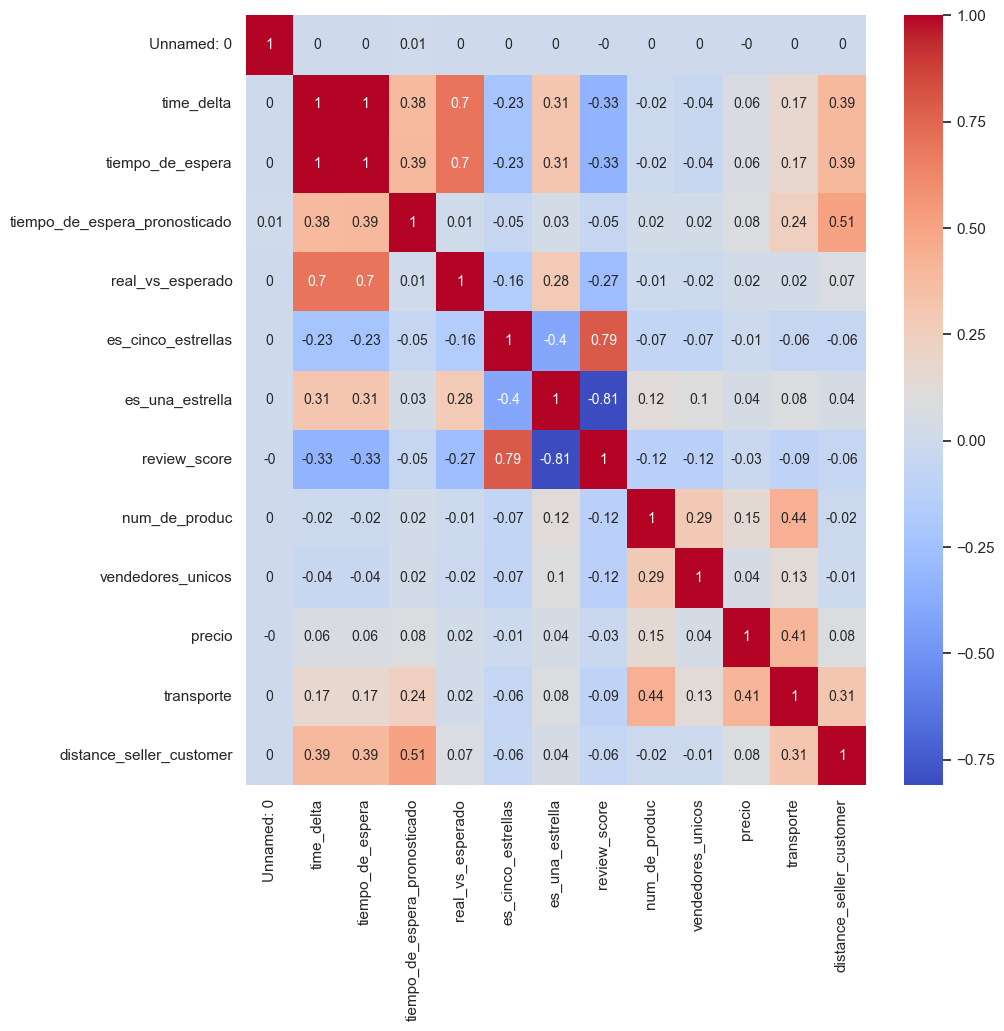

In [420]:
round(orders.corr(numeric_only=True),2)

plt.figure(figsize = (10, 10))

sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

I have made the decision to make 4 different models using different combinations of variables to see how this decision affects the results.

## 1- Univariate Linear Regression

I will use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api`.
- `model1`: an ols regression of `review_score` on `waiting_time`.
- `model2`: an ols regression of `review_score` on `real_vs_expected`.

For each, I will print the `summary` table and interpret the results:
- I will show how these results align with the seaborn plot.
- I will interpret `R-squared` as well as individual regression coefficients, `t-values`, `p-values`, and `95% confidence intervals`.

### ***Model 1:***

In [421]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='review_score ~ tiempo_de_espera', data=orders)
model1 = model1.fit()
print(model1.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

***→ R-squared*** = 0.112. It indicates that only 11.2% of the variation in the dependent variable (review_score) is explained by the independent variable (waiting_time). The remaining 88.8% of the variation in the dependent variable (review_score) is explained by other variables not included in the model.

***→ Individual Regression Coefficients***. The negative coefficient for waiting_time indicates that as waiting_time increases, review_score tends to decrease. The coefficient for waiting_time is -0.0454, meaning that for every 1-unit increase in waiting_time, review_score decreases by 0.0454.

***→ 't' Values***. The t-statistic (taken in absolute value) for this coefficient is very large. It is -109.747, indicating that the coefficient estimate is highly significant. A large t-value means that the relationship between the independent variable (waiting_time) and the dependent variable (review_score) is very unlikely to be due to chance. The larger the t-value, the stronger the evidence against the null hypothesis (that the coefficient is equal to zero).

***→ 'p' Values***. The p-value for this coefficient is very small (less than 0.05). It is 0.000, indicating that the probability of observing a t-statistic as extreme as this by chance is very low.

***→ 95% Confidence Intervals***. For this coefficient, the 95% confidence interval is -0.046 to -0.045. It does not include zero, further supporting the conclusion that waiting_time has a significant negative effect on review_score.

### ***Model 2:***

In [422]:
import statsmodels.formula.api as smf
model2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)
model2 = model2.fit()
print(model2.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

***→ R-squared*** = 0.074. It indicates that only 7.4% of the variation in the dependent variable (review_score) is explained by the independent variable (real_vs_expected). The remaining 92.6% of the variation in the dependent variable (real_vs_expected) is explained by other variables not included in the model.

***→ Individual Regression Coefficients***. The negative coefficient for real_vs_expected indicates that as real_vs_expected increases, review_score tends to decrease. The coefficient for real_vs_expected is -0.0752, meaning that for every 1-unit increase in real_vs_expected, review_score decreases by 0.0752.

***→ 't' Values***. The t-statistic (taken in absolute value) for this coefficient is very large. It is -87.644, indicating that the coefficient estimate is highly significant. A large t-value means that the relationship between the independent variable (real_vs_expected) and the dependent variable (review_score) is very unlikely to be due to chance. The larger the t-value, the stronger the evidence against the null hypothesis (that the coefficient is equal to zero).

***→ 'p' Values***. The p-value for this coefficient is very small (less than 0.05). It is 0.000, indicating that the probability of observing a t-statistic as extreme as this by chance is very low.

***→ 95% Confidence Intervals***. For this coefficient, the 95% confidence interval is -0.077 to -0.073. It does not include zero, further supporting the conclusion that real_vs_expected has a significant negative effect on review_score.

## 2- Multivariate Linear Regression

### ***Model 3:***

In [423]:
model3= smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado', data=orders)
model3 = model3.fit()
print(model3.summary())
coef_real_vs_esperado = model3.params['real_vs_esperado']
print(f"The impact on review_score of adding an extra day is {coef_real_vs_esperado:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:12   Log-Likelihood:            -1.5424e+05
No. Observations:               95857   AIC:                         3.085e+05
Df Residuals:                   95854   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [424]:
print(f"The coefficient for waiting_time is {model3.params['tiempo_de_espera']:.4f}")
print(f"The coefficient for real_vs_expected is {model3.params['real_vs_esperado']:.4f}")

The coefficient for waiting_time is -0.0383
The coefficient for real_vs_expected is -0.0205


I also decided to see what happens to `review_score` if an extra day is added to `real_vs_expected`, keeping everything else constant.

The impact on `review_score` of adding one more day to `real_vs_expected`, while keeping everything else constant, is -0.0205. In other words, for each increase of 1 in `real_vs_expected`, `review_score` decreases by 0.0205.



Moreover, I decided to observe which variable is more explanatory for `review_score` between `waiting_time` and `real_vs_expected`. In order to determine this, the coefficients need to be compared. As `waiting_time` has a higher coefficient, it is more explanatory for `review_score` than `real_vs_expected`.

Our multivariate regression allows us to isolate the impact of one feature while controlling for the effect of other features. These new coefficients are called **`partial correlation coefficients`**.

Finally, the R-squared of the multivariate regression is 0.112. This means that no more than 12% of the variations of `review_score` can be explained by the variations of `waiting_time` and `real_vs_expected`.

Now, I will create a new OLS `model4` with more features from the `orders` dataset so that I can improve the explanatory power of the model.


Notes: 
- I won't add two features that are perfectly collinear.
- I will transform each variable $X_i$ with the respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ to compare the partial regression coefficients $\beta_i$ in the same scale. $\beta_i$ will not be in the same dimension.


### ***Model 4:***

In [425]:
features = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']

In [426]:
from scipy.stats import zscore

columns_to_transform = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']
orders_zscore = orders[columns_to_transform].apply(zscore)
orders[columns_to_transform] = orders_zscore
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,-0.161781,0,0,4,-0.264603,-0.112554,-0.513784,-0.652018,-0.978986
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,-0.161781,0,0,4,-0.264603,-0.112554,-0.086646,0.000447,0.429687
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,-0.161781,1,0,5,-0.264603,-0.112554,0.111732,-0.164063,-0.145329
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,-0.161781,1,0,5,-0.264603,-0.112554,-0.441511,0.206782,2.053937
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,-0.161781,1,0,5,-0.264603,-0.112554,-0.562367,-0.652018,-0.958634


In [427]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + num_de_produc + vendedores_unicos + precio + transporte + distance_seller_customer'

In [428]:
model4 = smf.ols(formula=formula, data=orders)
model4 = model4.fit()
print(model4.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:12   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust  

### Most important characteristics of the model:

<Axes: >

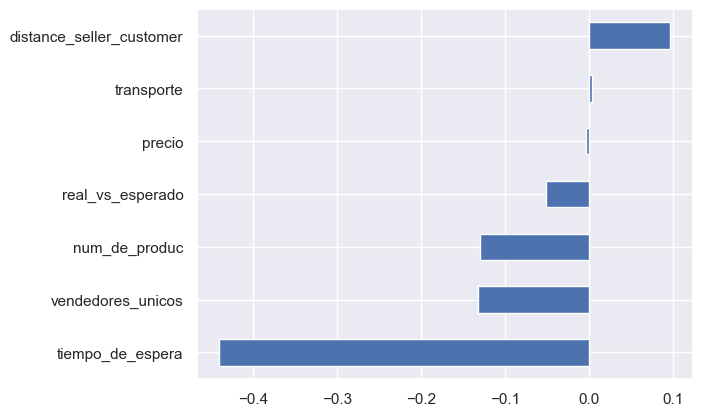

In [429]:
model4.params[1:].sort_values().plot(kind='barh')

After having added more features to the model and printing the summary I have decided to answer some questions about this new model.

### How has the overall performance of the regression changed?

The overall performance of the regression can be assessed through the R-squared value. In this case, the R-squared value increased from 0.114 to 0.145 (from model3 to model4), indicating that model 4 explains a bit more variation in the dependent variable (review_score) than model 3.

What happens here is that 14.5% of the variation in review_score can be explained by the combined variations in tiempo_de_espera, real_vs_esperado, distancia, freight_value, precio, and volumen. The other 85.5% of the variation in review_score can be explained by other variables not included in the model.

### Is this regression statistically significant?

To determine if a regression is statistically significant, we should look at the Prob (F-statistic). In this case, the Prob (F-statistic) value is 0.000, indicating that the model is statistically significant. If the model were not statistically significant, we couldn't rely on the results of individual coefficients.

### Which variable has the most impact?

To see which variable has the most impact, we should focus on the individual regression coefficients. In this case, the variable that has the most impact on review_score is tiempo_de_espera, as it has the highest coefficient (in absolute terms). It is -0.04401, meaning that for every increase of 1 in tiempo_de_espera, the review_score decreases by 0.4401.

### What happens with products and sellers when there are more?

To analyze what happens with products and sellers when there are more, we also need to observe the coefficients of individual regression (in this case, num_de_produc and vendedores_unicos). As both coefficients are negative, it means that as the number of products or sellers increases, the review_score decreases.

The coefficient for num_de_produc is -0.1297, meaning that for every increase of 1 in num_de_produc, the review_score decreases by 0.1297. The coefficient for vendedores_unicos is -0.1313, meaning that for every increase of 1 in vendedores_unicos, the review_score decreases by 0.1313.


### What happens with distance?

To analyze what happens with distance_seller_customer, we also need to observe the coefficient of individual regression. As the coefficient is positive, it means that as the distance increases, the review_score increases. The coefficient for distance_seller_customer is 0.0970, meaning that for every increase of 1 in distance_seller_customer, the review_score increases by 0.0970.


### What happens with price and freight?

To analyze what happens with price and freight, we also need to observe the coefficients of individual regression (in this case, precio and freight_value). As both coefficients have opposite signs, it means that as the price increases, the review_score decreases, while as the freight_value increases, the review_score increases.

The coefficient for precio is -0.0029, meaning that for every increase of 1 in precio, the review_score decreases by 0.0029. In contrast, the coefficient for freight_value is 0.0043, meaning that for every increase of 1 in freight_value, the review_score increases by 0.0043.


### What happens with F-statistics and p-value?

The F-statistic value measures the overall significance of the regression model. A high F-statistic value indicates that the regression model is statistically significant, meaning that at least one of the independent variables is related to the dependent variable. In this case, the F-statistic value is 2323, indicating that the regression model is statistically significant.

The P>|t| (p-value) is a measure of the statistical significance of each independent variable in the regression model. A high P>|t| value (greater than 0.05) indicates that the independent variable is not statistically significant in predicting the dependent variable.

On one hand, the P>|t| for precio is 0.489 and for freight_value is 0.385, meaning that these variables are not statistically significant in predicting the dependent variable (review_score) as their p-values are greater than 0.05. This suggests that price and freight cost do not have a significant impact on the review_score.

On the other hand, the P>|t| for the rest of the variables is 0.00 (less than 0.05), meaning that they are statistically significant in predicting the dependent variable (review_score). This suggests that tiempo_de_espera, real_vs_esperado, distancia, num_de_produc, and vendedores_unicos have a significant impact on the review_score.

### Analyzing R-squared

The R-squared value is a measure of the goodness of fit of the regression model. It indicates the proportion of the total variation in the dependent variable explained by the model. In this case, the R-squared value is 0.145, meaning that the model explains 14.5% of the total variation in the dependent variable (review_score).

A low R-squared is common when the number of observations (n) is much greater than the number of features (p). Relevant insights can still be derived from such regressions as long as they are statistically significant.

A low R-squared indicates that the model does not explain the variation in the dependent variable well, and there may be other important variables not considered in the model.

However, it's essential to note that a high R-squared value doesn't guarantee that the model is good, as there may be other variables affecting the dependent variable that are not considered in the model. Therefore, it's crucial to evaluate other aspects of the model, such as individual regression coefficients and p-values, to determine if the model is suitable for the data.

## 3- Check the models performance

Performance of the regression should not be measured solely by its R-squared!

We always need to visualize the distribution of predictions, and especially the residuals.

* That is why I will be calculating the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context).

In [430]:
n = len(model4.resid)
residuals = model4.predict() - orders['review_score']
residuals

0        0.306348
1        0.195736
2       -0.657087
3       -0.618111
4       -0.432611
           ...   
95852   -0.674814
95853   -0.259423
95854   -1.294416
95855    1.728967
95856   -0.556736
Name: review_score, Length: 95857, dtype: float64

In [431]:
residuals = residuals.std() / orders['review_score'].std() * 1 / (n ** 0.5)
residuals

0.002986507654213605

### Compute RMSE

In [432]:
from sklearn.metrics import mean_squared_error

y_true = orders['review_score']
y_pred = model4.predict()

rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"The RMSE is {rmse:.4f}")

The RMSE is 1.1883


### Plotting the results

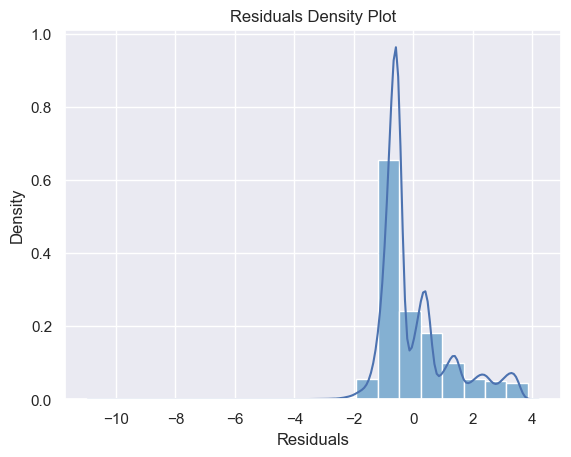

In [433]:
residuals = model4.predict() - orders['review_score']

sns.kdeplot(residuals, shade=False)
sns.set_style("darkgrid")
plt.hist(residuals, bins=20, density=True, color = '#84B0D2')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals Density Plot')
plt.show()

There was a question that came to my mind when analzying the shape of the Residuals Density Plot. 

### Why does the residual plot have such a strange shape?

The residual plot can have a strange shape if the regression model does not fit the data well. This may be because the model does not take into account all the important variables affecting the dependent variable (b1), or because the model is not flexible enough to capture the complexity between the independent variables (b0) and the dependent variable (b1).

I decided to plot on the same graph the `review_score` and the `predicted_review_score` in order to see how the model fits the data.

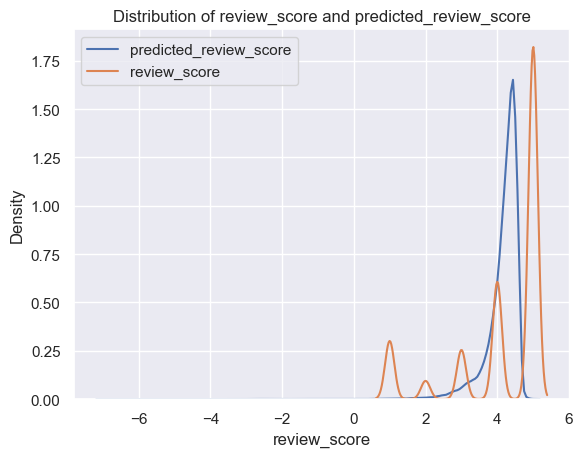

In [434]:
review_score = orders['review_score']
predicted_review_score = model4.predict()

sns.kdeplot(predicted_review_score, shade=False, label='predicted_review_score')
sns.kdeplot(review_score, shade=False, label='review_score')
sns.set_style("darkgrid")
plt.xlabel('review_score')
plt.ylabel('Density')
plt.title('Distribution of review_score and predicted_review_score')
plt.legend()
plt.show()

Using the seaborn library we could have plotted a `linear regression` from `review_score` compared to`real_vs_expected`.

I will be doing this with a `subset` of the data and with the `whole dataset`.

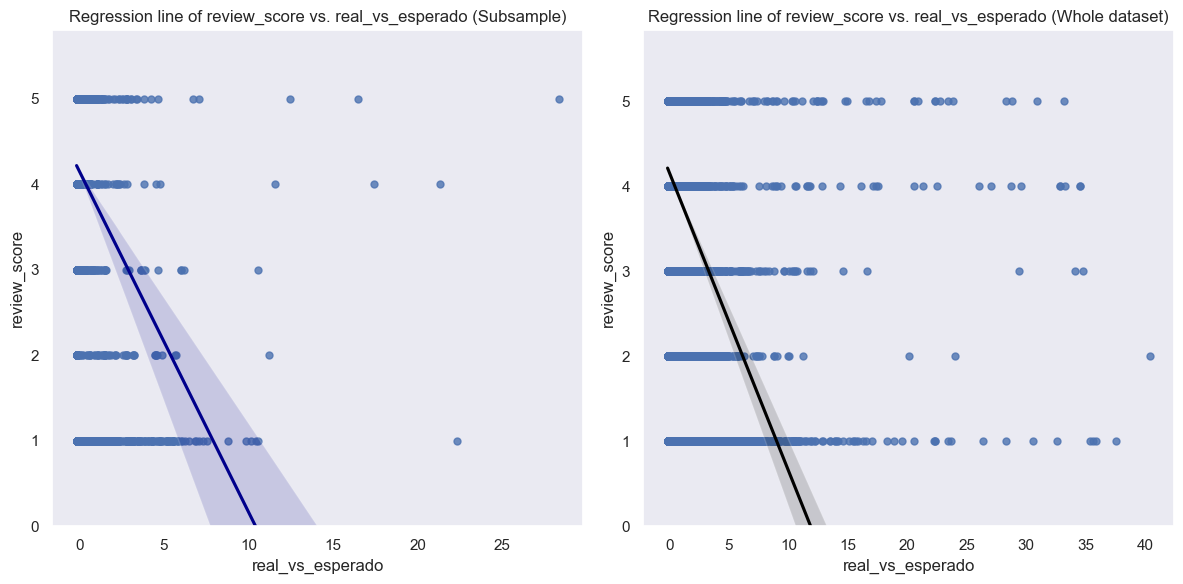

In [435]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subset
sub_muestra = orders.sample(n=9000, random_state=42)
sns.set(style="darkgrid")
plot1 = sns.regplot(x="real_vs_esperado", y="review_score", data=sub_muestra, ci=95, scatter_kws={"s": 25}, line_kws={"color": "darkblue"}, ax=axes[0])
plot1.set(ylim=(0, None))
axes[0].set_title("Regression line of review_score vs. real_vs_esperado (Subsample)")
axes[0].grid(False)

# The whole dataset
sns.set(style="darkgrid")
plot2 = sns.regplot(x="real_vs_esperado", y="review_score", data=orders, ci=95, scatter_kws={"s": 25}, line_kws={"color": "black"}, ax=axes[1])
plot2.set(ylim=(0, None))
axes[1].set_title("Regression line of review_score vs. real_vs_esperado (Whole dataset)")
axes[1].grid(False)

plt.tight_layout()
plt.show()
